In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import math

In [2]:
df=pd.read_csv('final_2.csv')

In [3]:
df

,Depth,RD,BDC,NPHIC,ACC,RHOZ,SP,TNPH,WCL(%)
0,3982.257080,25.034900,0.0896,23.7691,12.1684,2.9418,-275.4375,0.3095,17.700000
1,3982.561758,22.251100,0.0893,36.2486,12.2275,2.9511,-275.0000,0.3183,16.457480
2,3982.866406,16.991800,0.0963,35.6541,12.2743,2.9750,-273.9375,0.3344,15.459973
3,3983.171053,14.521400,0.0858,39.0889,12.2255,2.9379,-275.4375,0.3365,14.707480
4,3983.475701,13.328300,0.0771,46.0304,12.3761,2.9526,-276.3750,0.3625,14.200000
...,...,...,...,...,...,...,...,...,...
187,4039.227309,6.508999,0.1488,35.2148,12.4678,3.0411,-276.4375,0.4625,12.906283
188,4039.531956,6.629900,0.1382,34.0456,12.4696,3.0449,-275.3125,0.4474,14.678365
189,4039.836604,8.165100,0.1363,31.8556,12.4400,3.0178,-274.7500,0.4218,16.618012
190,4040.141252,9.447600,0.1255,32.6244,12.4205,3.0324,-273.8750,0.4189,18.725224


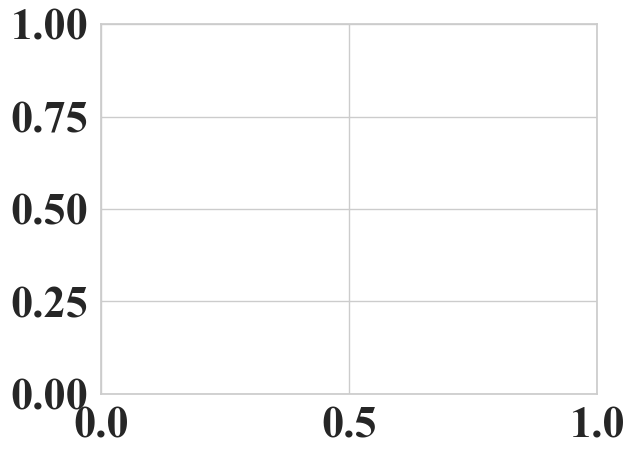

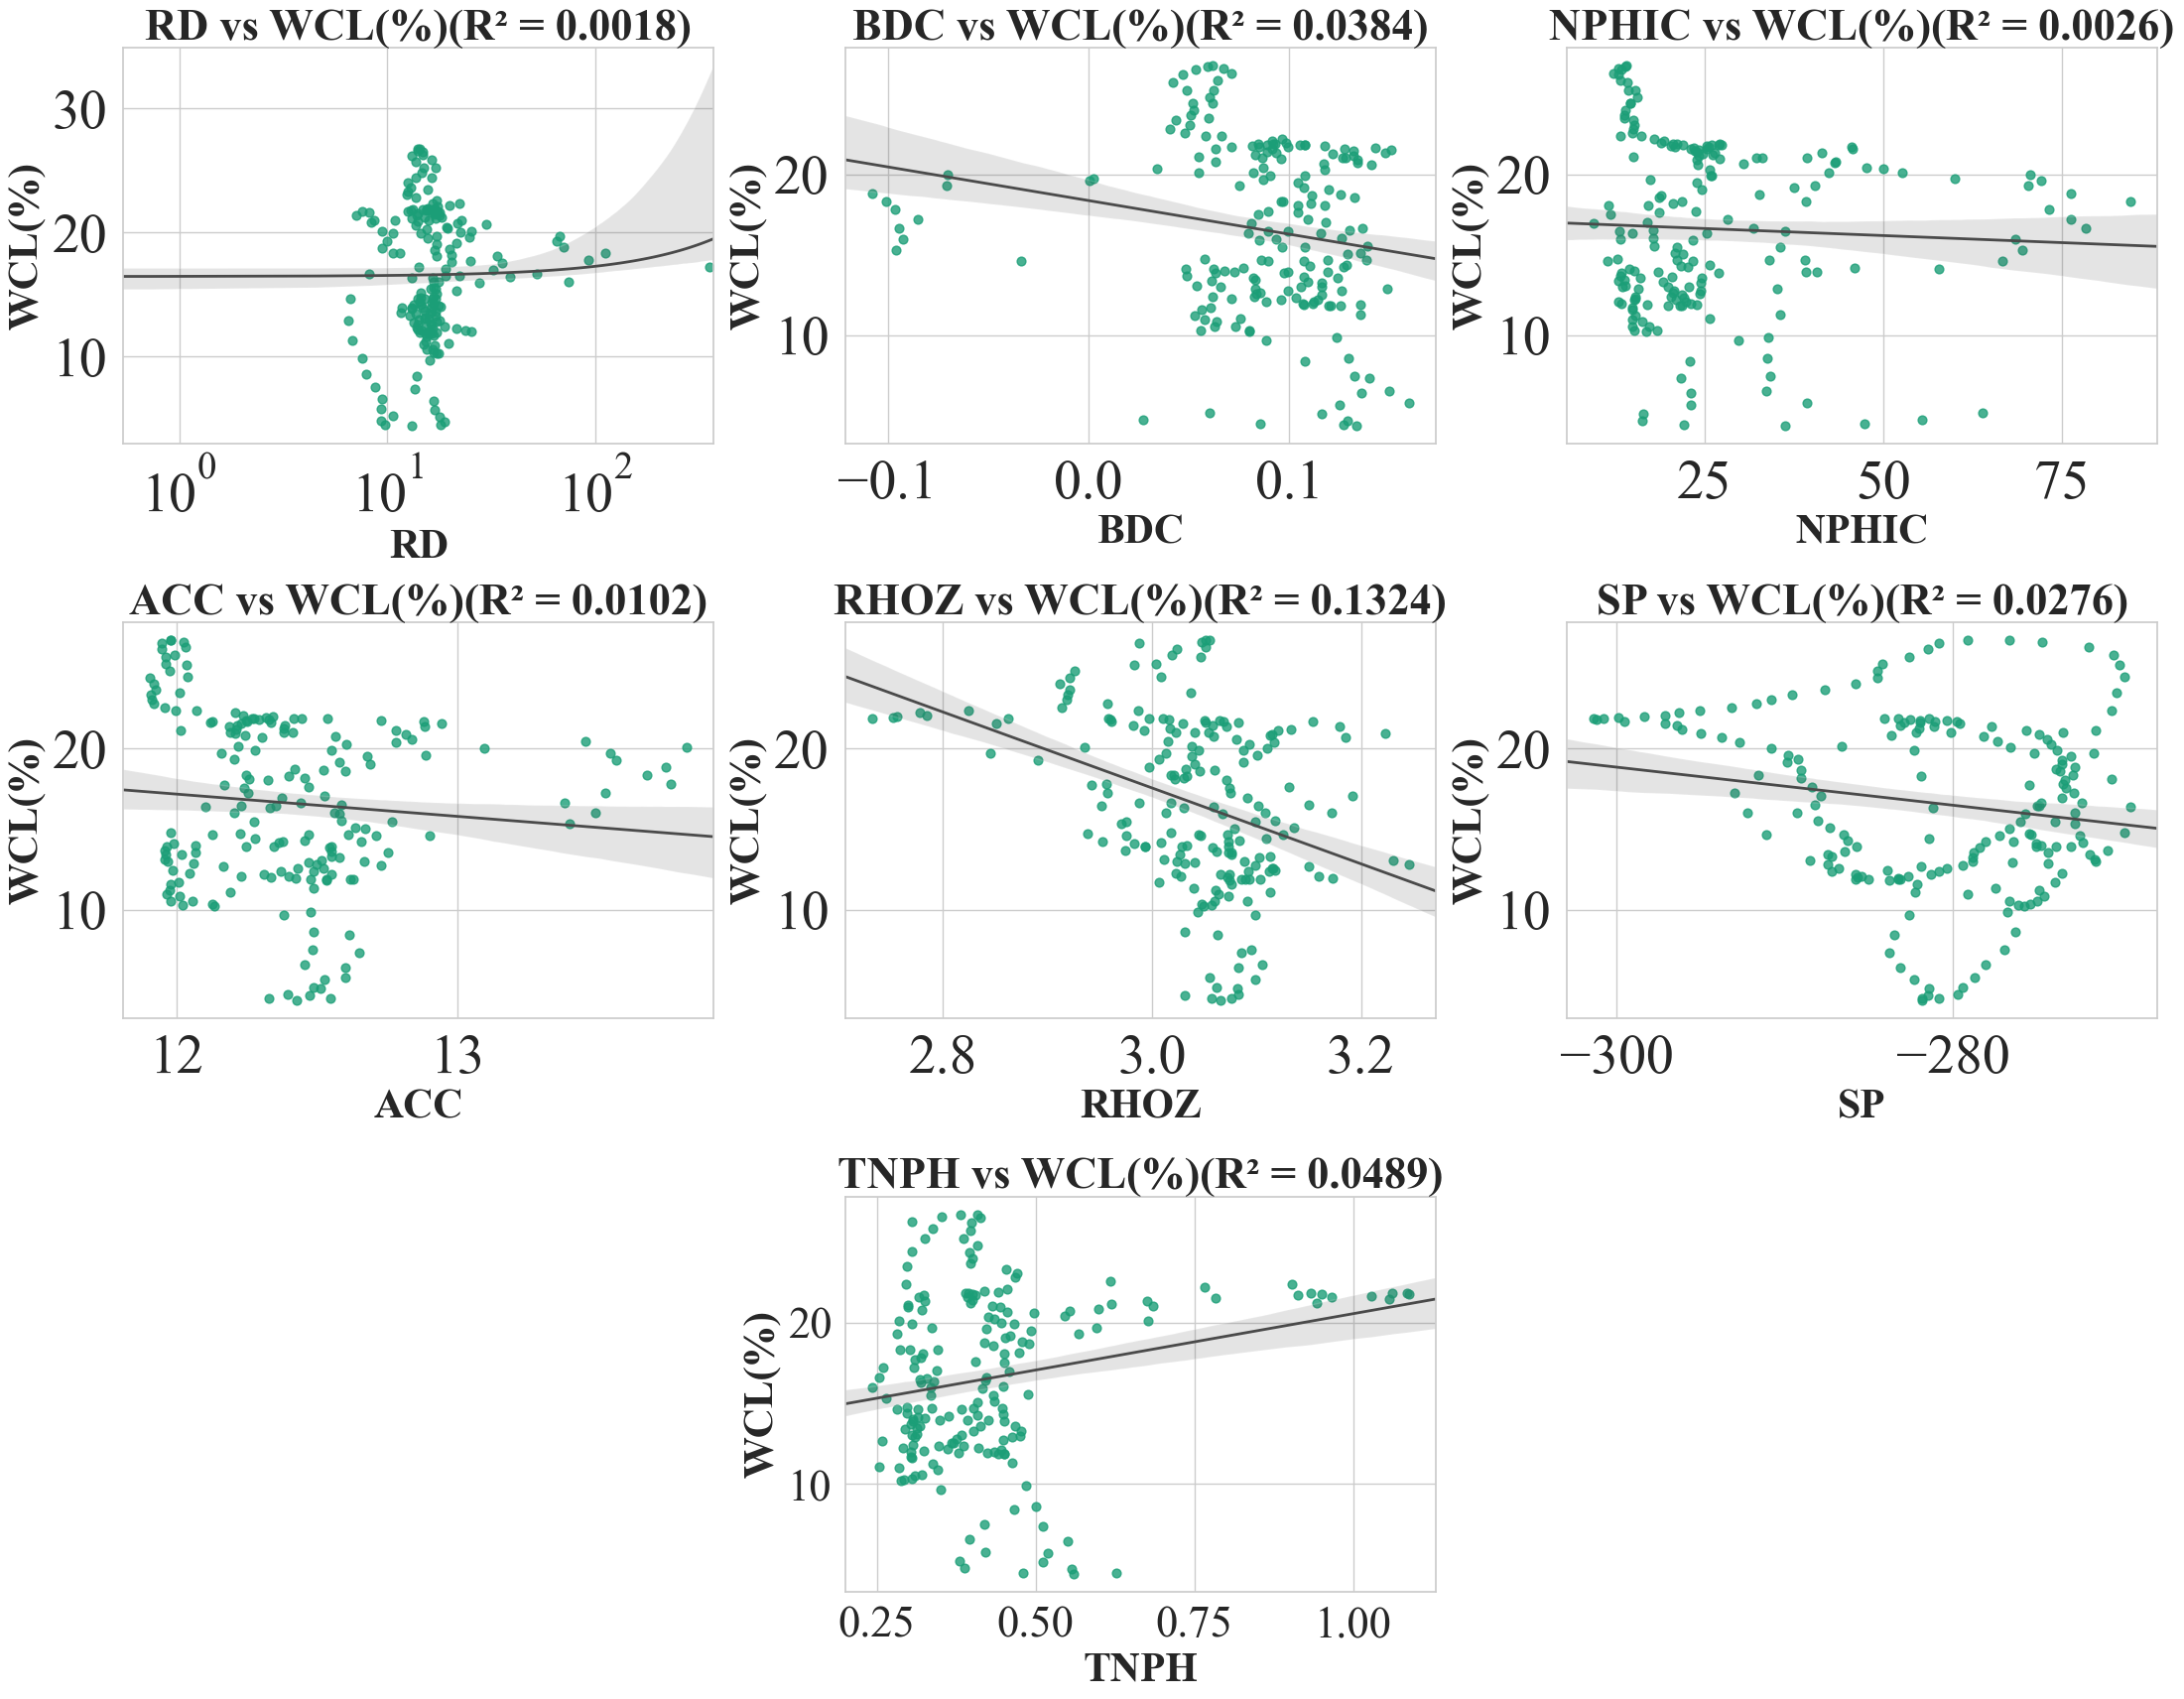

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Assuming df is already defined and has the required data

# Define predictors and target
predictors = ['RD', 'BDC', 'NPHIC', 'ACC', 'RHOZ', 'SP', 'TNPH']
target = 'WCL(%)'

# Seaborn settings for a more organic look
sns.set(style="whitegrid", font="Times New Roman", rc={"axes.labelsize": 14, "axes.titlesize": 20})

# Set global font sizes for ticks
plt.rc('xtick', labelsize=32)  # Increase x-tick label size
plt.rc('ytick', labelsize=32)  # Increase y-tick label size
plt.xticks(fontsize=32, fontweight='bold')  # Bold x-tick labels
plt.yticks(fontsize=32, fontweight='bold')  # Bold y-tick labels
fig, axs = plt.subplots(3, 3, figsize=(22, 18))

# Define color palette
scatter_color = '#1b9e77'  # Dark muted green for scatter points
line_color = '#4a4a4a'     # Dark gray for regression lines

# Iterate through predictors and plot regression subplots with seaborn
for i, predictor in enumerate(predictors):
    # Skip axs[2, 1] to place the last plot there
    if i == 6:
        continue
        
    row, col = divmod(i, 3)
    
    # Prepare data for regression
    X = df[[predictor]].values
    y = df[target].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate R²
    r2 = r2_score(y, y_pred)
    
    # Seaborn regplot with scatter points, regression line, and confidence interval
    sns.regplot(x=predictor, y=target, data=df, ax=axs[row, col], 
                scatter_kws={'color': scatter_color, 's': 40},  # Scatter points
                line_kws={'color': line_color, 'lw': 2},         # Regression line
                ci=90,                                           # 90% confidence interval
                truncate=False)                                  # Keep full range
    
    # Set title and axis labels
    axs[row, col].set_title(f'{predictor} vs {target}(R² = {r2:.4f})', fontsize=32, fontweight='bold')
    axs[row, col].set_xlabel(f'{predictor}', fontsize=30, fontweight='bold')  # Increased x-label size and weight
    axs[row, col].set_ylabel(f'{target}', fontsize=30, fontweight='bold')     # Increased y-label size and weight
    
    # If the predictor is 'RD', set the x-axis to logarithmic scale
    if predictor == 'RD':
        axs[row, col].set_xscale('log')
        
    # Set tick parameters for better visibility
    axs[row, col].tick_params(axis='both', which='major', labelsize=40, width=2, length=8)

# Plot the last predictor at axs[2, 1]
X = df[[predictors[6]]].values
y = df[target].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

sns.regplot(x=predictors[6], y=target, data=df, ax=axs[2, 1],
            scatter_kws={'color': scatter_color, 's': 40},  # Scatter points
            line_kws={'color': line_color, 'lw': 2},         # Regression line
            ci=90,                                           # 90% confidence interval
            truncate=False)                                  # Keep full range

axs[2, 1].set_title(f'{predictors[6]} vs {target}(R² = {r2:.4f})', fontsize=32, fontweight='bold')
axs[2, 1].set_xlabel(f'{predictors[6]}', fontsize=30, fontweight='bold')  # Increased x-label size and weight
axs[2, 1].set_ylabel(f'{target}', fontsize=30, fontweight='bold')         # Increased y-label size and weight

# Remove the empty last subplot
fig.delaxes(axs[2, 2])
fig.delaxes(axs[2, 0])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure for publication quality
plt.savefig('crossplot_2.png', dpi=1000, bbox_inches='tight')

plt.show()


In [9]:
import pandas as pd
from scipy.stats import skew, kurtosis


summary_T2 = df.describe().T

summary_T2['skewness'] = df.skew()
summary_T2['kurtosis'] = df.kurtosis()


summary_T2.to_csv('summary.csv', index=True) 

In [ ]:
summary_T2

In [ ]:
df.columns

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis

# List of columns to include in the correlation matrix
columns = ['Depth', 'RD', 'BDC', 'NPHIC', 'ACC', 'RHOZ', 'SP', 'TNPH', 'WCL(%)']

# Calculate the correlation matrix
corr = df[columns].corr()

# Generate a mask for the upper triangle (to display only the lower triangle)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the font to Times New Roman for all text
plt.rcParams['font.family'] = 'Times New Roman'

# Create a heatmap with the mask applied
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})

# Set the title
#plt.title('Correlation Matrix', fontsize=16)

# Save the figure if needed
plt.savefig('correlation_matrix_lower_triangle.png', dpi=300)

# Show the plot
plt.show()


In [13]:
corr=df.corr().T

In [14]:
corr.to_csv('corr.csv')

In [ ]:
corr

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of columns to plot
columns = ['RD', 'BDC', 'NPHIC', 'ACC', 'RHOZ', 'SP', 'TNPH', 'WCL(%)']

# Set the style and color palette for a professional look
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

# Set the font family globally to 'Times New Roman'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # Adjust font size as needed

# Define the subplot layout (2 rows and 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))  # Adjust figsize to make it suitable for your paper

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    if col == 'RD':  # Apply log scale to 'RD'
        sns.histplot(np.log10(df[col]), kde=True, ax=axes[i], color=palette[i % len(palette)])
        axes[i].set_title(f'{col} (Log Scale)', fontsize=14)
        #axes[i].set_xlabel('Value', fontsize=12)
    else:  # Normal scale for other columns
        sns.histplot(df[col], kde=True, ax=axes[i], color=palette[i % len(palette)])
        axes[i].set_title(col, fontsize=14)
        #axes[i].set_xlabel('Value', fontsize=12)
    
    # Only add y-labels on the leftmost plots
    if i % 4 == 0:
        axes[i].set_ylabel('Frequency', fontsize=12)
    else:
        axes[i].set_ylabel('')

# Uncomment to add a title for the entire figure
# plt.suptitle('Histogram Plot of Well 11A', fontsize=20, fontweight='bold', fontfamily='Times New Roman')

# Adjust layout for better spacing, including the title
plt.tight_layout(rect=[0, 0, 1, 1]) 

# Save the figure if needed
plt.savefig('histogram_subplot.png', dpi=500)

# Show plot
plt.show()


In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data creation (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with actual data source
# df = df.sort_values(by='Depth')  # Ensure data is sorted by depth

# List of columns to plot
columns = ['RD', 'BDC', 'NPHIC', 'ACC', 'RHOZ', 'SP', 'TNPH',]

# List of colors to use for each plot
colors = ['darkblue', 'darkgreen', 'darkred', 'purple', 'saddlebrown', 'darkslateblue', 'midnightblue']

# Set the style for a professional look
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Define the subplot layout (1 row and 7 columns, one for each log)
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10), sharey=True)

# Plot each log
for i, col in enumerate(columns):
    if col == 'RD':  # Apply log scale to RD
        axes[i].plot(np.log10(df[col]), df['Depth'], color=colors[i])
        axes[i].set_title(f'{col} (Log Scale)', fontsize=20, fontweight='bold')
    else:  # Normal scale for other columns
        axes[i].plot(df[col], df['Depth'], color=colors[i])
        axes[i].set_title(col, fontsize=20, fontweight='bold')

    axes[i].invert_yaxis()  # Invert y-axis to have depth increasing downwards
    
    # Set tick size for both axes
    axes[i].tick_params(axis='both', which='major', labelsize=15)  # Increase tick label size
    axes[i].tick_params(axis='both', which='minor', labelsize=15)  # For minor ticks if needed
    
    if i == 0:
        axes[i].set_ylabel('Depth (m)', fontsize=20, fontweight='bold')  # Set depth label only for the first subplot
    else:
        axes[i].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure if needed
plt.savefig('well_log_plot_with_log_rd_different_colors.png', dpi=600)

# Show plot
plt.show()



In [4]:
df = pd.read_excel("C:\\Users\\absid\\Downloads\\rank.xlsx")

In [5]:
df

,M,Rank
0,HM_3,10
1,HM_1,14
2,GB,22
3,HM_2,23
4,XGB,23
5,CB,34


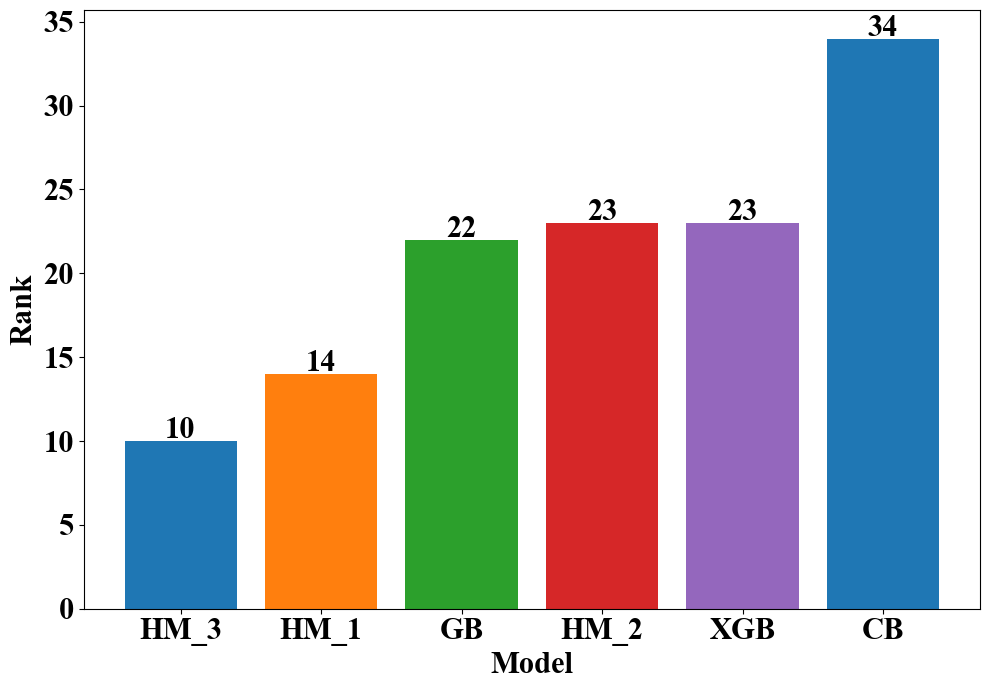

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = "Times new Roman"
plt.rcParams["font.monospace"] = ["FreeMono"]
# Create the figure and bar plot
plt.figure(figsize=(10,7))
bars = plt.bar(df['M'], df['Rank'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add labels and titles with professional formatting
plt.xlabel('Model', fontsize=22, weight='bold')
plt.ylabel('Rank', fontsize=22, weight='bold')

# Customize ticks for a polished look
plt.xticks(fontsize=22, rotation=0, weight='bold')
plt.yticks(fontsize=22, weight='bold')

# Remove background grid
plt.grid(False)

# Adding value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.25, f'{height}', 
             ha='center', va='bottom', fontsize=22, color='black', weight='bold')

# Display the plot
plt.tight_layout()
# Save the figure if needed
plt.savefig('model_rank.png', dpi=1000)
plt.show()
# Save the figure if needed



In [7]:
df = pd.read_excel("C:\\Users\\absid\\Downloads\\rank2.xlsx")
df

,Ei,Rank
0,RHOZ,9
1,ACC,18
2,RD,20
3,SP,20
4,TNPH,30
5,BDC,34
6,NPHIC,37


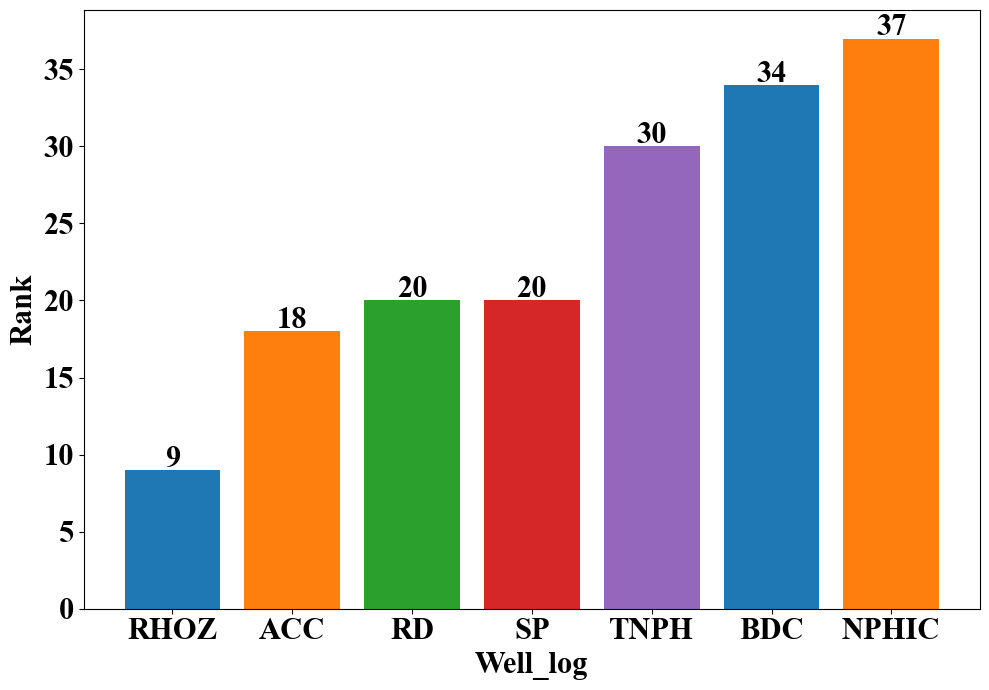

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the figure and bar plot
plt.figure(figsize=(10,7))
bars = plt.bar(df['Ei'], df['Rank'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Add labels and titles with professional formatting
plt.xlabel('Well_log', fontsize=22, weight='bold')
plt.ylabel('Rank', fontsize=22, weight='bold')

# Customize ticks for a polished look
plt.xticks(fontsize=22, rotation=0, weight='bold')
plt.yticks(fontsize=22, weight='bold')

# Remove background grid
plt.grid(False)

# Adding value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.25, f'{height}', 
             ha='center', va='bottom', fontsize=22, color='black', weight='bold')

# Display the plot
plt.tight_layout()
# Save the figure if needed
plt.savefig('input_rank.png', dpi=1000)
plt.show()
# Save the figure if needed